# Physical activity monitoring project 

**Project enviroment**

requiments_pam.txt


In [1]:
# Log in to your W&B account
# import wandb

import random
import math
import os
import pandas as pd
import numpy as np

# wandb.login()

---

# Open data and reating data

In [4]:

# Define the path to your file
folder_path = r"C:\Users\malit\Documents\GitHub\AI_ML_data\PAMAP2_Dataset\protocol_data_v1"

file_name = "subject101.csv"

for i in range(9):
    file_name = "subject10" + str(i+1) + ".csv"
    print(file_name)

file_name = "subject101.csv"
file_path = os.path.join(folder_path, file_name)

# Load the data, specifying the correct delimiter (comma) and no header
csv_data = np.loadtxt(file_path, delimiter=',', dtype=float, comments=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='utf-8', max_rows=None)
np.set_printoptions(precision=6, suppress=True)
print(csv_data)

subject101.csv
subject102.csv
subject103.csv
subject104.csv
subject105.csv
subject106.csv
subject107.csv
subject108.csv
subject109.csv
[[   8.38    0.    104.   ...    0.      0.      0.  ]
 [   8.39    0.    104.   ...    0.      0.      0.  ]
 [   8.4     0.    104.   ...    0.      0.      0.  ]
 ...
 [3772.52    0.    128.   ...    0.      0.      0.  ]
 [3772.53    0.    128.   ...    0.      0.      0.  ]
 [3772.54    0.    128.   ...    0.      0.      0.  ]]


In [ ]:
column_names = [
    "timestamp",
    "activity_id",
    "heart_rate",
    # IMU Hand
    "hand_temp",
    "hand_acc_16g_x", "hand_acc_16g_y", "hand_acc_16g_z",
    "hand_acc_6g_x", "hand_acc_6g_y", "hand_acc_6g_z",
    "hand_gyro_x", "hand_gyro_y", "hand_gyro_z",
    "hand_mag_x", "hand_mag_y", "hand_mag_z",
    "hand_orient_1", "hand_orient_2", "hand_orient_3", "hand_orient_4",
    # IMU Chest
    "chest_temp",
    "chest_acc_16g_x", "chest_acc_16g_y", "chest_acc_16g_z",
    "chest_acc_6g_x", "chest_acc_6g_y", "chest_acc_6g_z",
    "chest_gyro_x", "chest_gyro_y", "chest_gyro_z",
    "chest_mag_x", "chest_mag_y", "chest_mag_z",
    "chest_orient_1", "chest_orient_2", "chest_orient_3", "chest_orient_4",
    # IMU Ankle
    "ankle_temp",
    "ankle_acc_16g_x", "ankle_acc_16g_y", "ankle_acc_16g_z",
    "ankle_acc_6g_x", "ankle_acc_6g_y", "ankle_acc_6g_z",
    "ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z",
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z",
    "ankle_orient_1", "ankle_orient_2", "ankle_orient_3", "ankle_orient_4"
]

activity_labels = {
    0: "Other (transient)",
    1: "Lying",
    2: "Sitting",
    3: "Standing",
    4: "Walking",
    5: "Running",
    6: "Cycling",
    7: "Nordic walking",
    9: "Watching TV",
    10: "Computer work",
    11: "Car driving",
    12: "Ascending stairs",
    13: "Descending stairs",
    16: "Vacuum cleaning",
    17: "Ironing",
    18: "Folding laundry",
    19: "House cleaning",
    20: "Playing soccer",
    24: "Rope jumping"
}




19


In [9]:
# Print the shape and the first 5 rows of the new array
print("Shape of the NumPy array:", csv_data.shape)
print("First 5 rows of the NumPy array:")
print(csv_data[:5])

Shape of the NumPy array: (373161, 54)
First 5 rows of the NumPy array:
[[  8.38       0.       104.        30.         2.37223    8.60074
    3.51048    2.43954    8.76165    3.35465   -0.092217   0.056812
   -0.015845  14.6806   -69.2128    -5.58905    1.         0.
    0.         0.        31.8125     0.23808    9.80003   -1.68896
    0.265304   9.81549   -1.41344   -0.005065  -0.006781  -0.005663
    0.47196  -51.0499    43.2903     1.         0.         0.
    0.        30.3125     9.65918   -1.65569   -0.099797   9.64689
   -1.55576    0.310404   0.0083     0.00925   -0.01758  -61.1888
  -38.9599   -58.1438     1.         0.         0.         0.      ]
 [  8.39       0.       104.        30.         2.18837    8.5656
    3.66179    2.39494    8.55081    3.64207   -0.024413   0.047759
    0.006474  14.8991   -69.2224    -5.82311    1.         0.
    0.         0.        31.8125     0.31953    9.61282   -1.49328
    0.234939   9.78539   -1.42846    0.013685   0.001486  -0.041522
 

In [20]:
print(csv_data.shape[0]/2)

186580.5


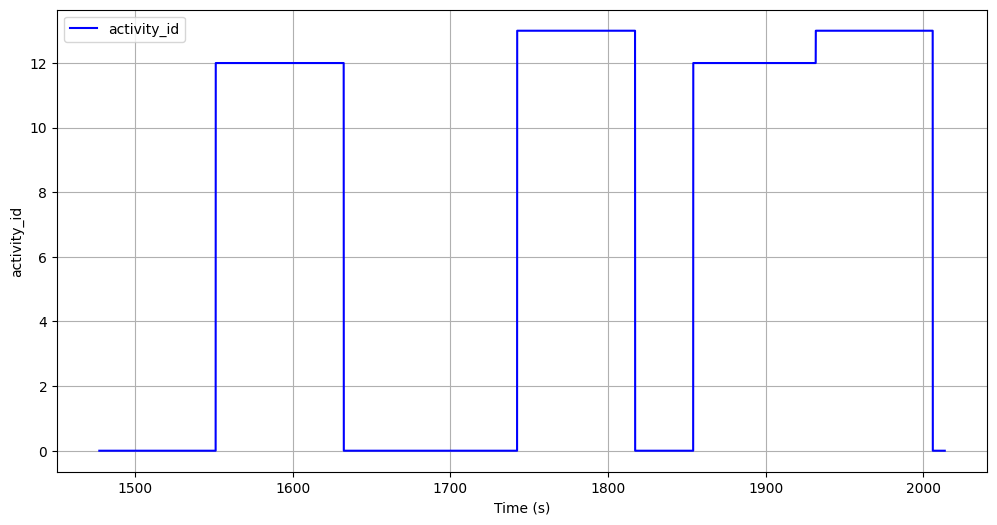

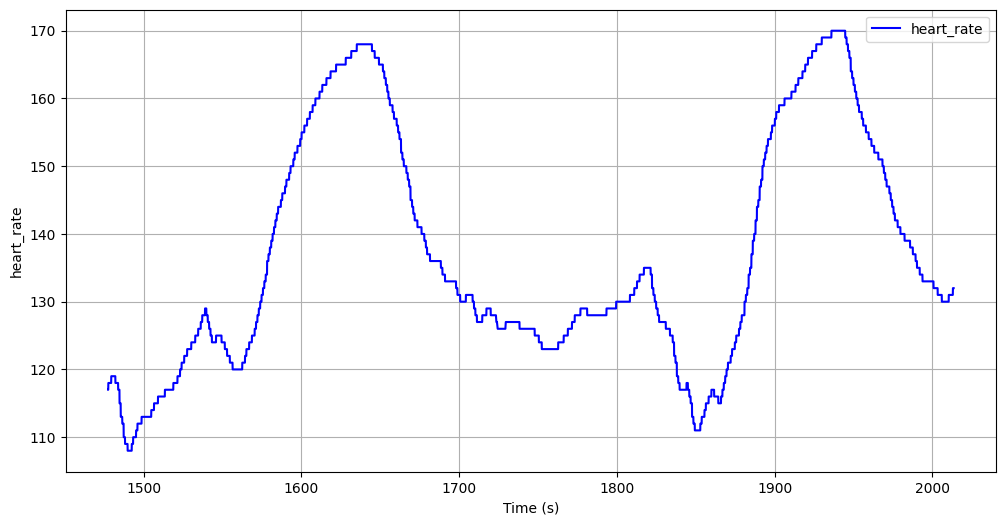

In [23]:
# plot the first 1000 samples of the heart rate
import matplotlib.pyplot as plt
import numpy as np

for i in range(1,3,1):  
    plot_column_no = i  # heart rate column index

    # time = csv_data[0:100, 0]  # first column is the timestamp
    # heart_rate = csv_data[0:100, plot_column_no]  

    time = csv_data[146580:200000, 0]  # first column is the timestamp
    heart_rate = csv_data[146580:200000, plot_column_no]

    plt.figure(figsize=(12, 6))
    plt.plot(time, heart_rate, label= column_names[plot_column_no], color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel(column_names[plot_column_no])

    plt.legend()
    plt.grid()

    plt.savefig(f'C:\\Users\\malit\\Documents\\GitHub\\AI_ML_data\\column_{plot_column_no}_{column_names[plot_column_no]}.png')
    plt.show()




---

In [25]:
# column name are listed in column_names variable. column_names[1] contains the activity_id. I need to know how much 
# time the subject spent in each activity. and number of rows in each activity Get it as print out.

activity_id_col = 1  # index for activity_id
timestamp_col = 0    # index for timestamp

# Get unique activities
unique_activities = np.unique(csv_data[:, activity_id_col])

print("Activity Summary:")

for act_id in unique_activities:
    # Filter rows for this activity
    mask = csv_data[:, activity_id_col] == act_id
    rows = csv_data[mask]
    num_rows = rows.shape[0]
    
    # Calculate time spent (in seconds)
    if num_rows > 1:
        time_spent = rows[-1, timestamp_col] - rows[0, timestamp_col]
    else:
        time_spent = 0
    
    activity_name = activity_labels.get(int(act_id), f"Unknown ({int(act_id)})")
    print(f"Activity: {activity_name:20} | ID: {int(act_id):2} | Rows: {num_rows:7} | Time spent: {time_spent:.2f} seconds")



Activity Summary:
Activity: Other (transient)    | ID:  0 | Rows:  125953 | Time spent: 3764.16 seconds
Activity: Lying                | ID:  1 | Rows:   27179 | Time spent: 271.86 seconds
Activity: Sitting              | ID:  2 | Rows:   23465 | Time spent: 234.79 seconds
Activity: Standing             | ID:  3 | Rows:   21593 | Time spent: 217.16 seconds
Activity: Walking              | ID:  4 | Rows:   21383 | Time spent: 222.52 seconds
Activity: Running              | ID:  5 | Rows:   20684 | Time spent: 212.64 seconds
Activity: Cycling              | ID:  6 | Rows:   23492 | Time spent: 235.74 seconds
Activity: Nordic walking       | ID:  7 | Rows:   20053 | Time spent: 202.64 seconds
Activity: Ascending stairs     | ID: 12 | Rows:   15875 | Time spent: 380.50 seconds
Activity: Descending stairs    | ID: 13 | Rows:   14892 | Time spent: 263.54 seconds
Activity: Vacuum cleaning      | ID: 16 | Rows:   22875 | Time spent: 229.40 seconds
Activity: Ironing              | ID: 17 | Rows

In [ ]:
activity_id_col = 1
activity_id = 1
mask = csv_data[:, activity_id_col] == activity_id
rows = csv_data[mask]

print(rows)

# distance bitween two time samples
time_step = rows[1, 0] - rows[0, 0]
print(f"{time_step:.3f}")  # should be around 0.01 seconds (100 Hz)




[[ 37.66   1.   100.   ...   0.     0.     0.  ]
 [ 37.67   1.   100.   ...   0.     0.     0.  ]
 [ 37.68   1.   100.   ...   0.     0.     0.  ]
 ...
 [309.5    1.    90.   ...   0.     0.     0.  ]
 [309.51   1.    90.   ...   0.     0.     0.  ]
 [309.52   1.    90.   ...   0.     0.     0.  ]]
0.010


In [42]:
# check using column 1 that we have consecative rows for each activity id is there missing values
activity_id_col = 1

for i in range(0,25):
    activity_id = i
    mask = csv_data[:, activity_id_col] == activity_id
    rows = csv_data[mask]
    if len(rows) == 0:
        print(f"No data found for activity ID {activity_id}")
    else:
        # Check for consecutive rows with time difference in range 0.010 - 0.015
        time_stamps = rows[:, 0]
        diffs = np.diff(time_stamps)
        if np.all((diffs >= 0.010) & (diffs <= 0.015)):
            print(f"All rows for activity ID {activity_id} are consecutive (time diff in range 0.010-0.015).")
        else:
            print(f"Missing or non-consecutive rows found for activity ID {activity_id}.")


Missing or non-consecutive rows found for activity ID 0.
Missing or non-consecutive rows found for activity ID 1.
Missing or non-consecutive rows found for activity ID 2.
Missing or non-consecutive rows found for activity ID 3.
Missing or non-consecutive rows found for activity ID 4.
Missing or non-consecutive rows found for activity ID 5.
Missing or non-consecutive rows found for activity ID 6.
Missing or non-consecutive rows found for activity ID 7.
No data found for activity ID 8
No data found for activity ID 9
No data found for activity ID 10
No data found for activity ID 11
Missing or non-consecutive rows found for activity ID 12.
Missing or non-consecutive rows found for activity ID 13.
No data found for activity ID 14
No data found for activity ID 15
Missing or non-consecutive rows found for activity ID 16.
Missing or non-consecutive rows found for activity ID 17.
No data found for activity ID 18
No data found for activity ID 19
No data found for activity ID 20
No data found for

In [ ]:
# Define the path to your file
folder_path = r"C:\Users\malit\Documents\GitHub\AI_ML_data\PAMAP2_Dataset\protocol_data_v1"

file_name = "subject101.csv"

for i in range(9):
    file_name_wihout_ext = "subject10" + str(i+1)
    file_name = "subject10" + str(i+1) + ".csv"
    print(file_name)

file_name = "subject101.csv"
file_path = os.path.join(folder_path, file_name)

# Load the data, specifying the correct delimiter (comma) and no header
csv_data = np.loadtxt(file_path, delimiter=',', dtype=float, comments=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='utf-8', max_rows=None)
np.set_printoptions(precision=6, suppress=True)
print(csv_data)


activity_id_col = 1
timestamp_col = 0

output_folder = "activity_chunks"
new_folder_path = os.path.join(folder_path, output_folder)
os.makedirs(new_folder_path, exist_ok=True)

for i in range(1, 3):
    activity_id = i
    mask = csv_data[:, activity_id_col] == activity_id
    rows = csv_data[mask]
    if len(rows) == 0:
        print(f"No data found for activity ID {activity_id}")
        continue

    # Split into 100-row chunks
    num_chunks = len(rows) // 100
    for chunk_idx in range(num_chunks):
        chunk = rows[chunk_idx * 100 : (chunk_idx + 1) * 100]
        time_stamps = chunk[:, timestamp_col]
        diffs = np.diff(time_stamps)
        # Check for consecutive rows (time diff in range 0.008 - 0.015)
        if np.all((diffs >= 0.008) & (diffs <= 0.015)):
            # Save chunk to CSV
            out_path = os.path.join(new_folder_path, f"{file_name_wihout_ext}_activity_{activity_id}_chunk_{chunk_idx}.csv")
            np.savetxt(out_path, chunk, delimiter=",", fmt="%.6f")
            print(f"Saved: {out_path}")
        else:
            print(f"Skipped chunk {chunk_idx} for activity ID {activity_id} due to gaps.")

subject101.csv
subject102.csv
subject103.csv
subject104.csv
subject105.csv
subject106.csv
subject107.csv
subject108.csv
subject109.csv
[[   8.38    0.    104.   ...    0.      0.      0.  ]
 [   8.39    0.    104.   ...    0.      0.      0.  ]
 [   8.4     0.    104.   ...    0.      0.      0.  ]
 ...
 [3772.52    0.    128.   ...    0.      0.      0.  ]
 [3772.53    0.    128.   ...    0.      0.      0.  ]
 [3772.54    0.    128.   ...    0.      0.      0.  ]]
Skipped chunk 0 for activity ID 0 due to gaps.
Skipped chunk 1 for activity ID 0 due to gaps.
Skipped chunk 2 for activity ID 0 due to gaps.
Skipped chunk 3 for activity ID 0 due to gaps.
Skipped chunk 4 for activity ID 0 due to gaps.
Skipped chunk 5 for activity ID 0 due to gaps.
Skipped chunk 6 for activity ID 0 due to gaps.
Skipped chunk 7 for activity ID 0 due to gaps.
Skipped chunk 8 for activity ID 0 due to gaps.
Skipped chunk 9 for activity ID 0 due to gaps.
Skipped chunk 10 for activity ID 0 due to gaps.
Skipped chu